код снизу позволил сгенерировать данные для необходимых полей, пришлось установить библиотеку faker

import pandas as pd
import numpy as np
from faker import Faker
from datetime import datetime, timedelta

fake = Faker('ru_RU')
rows_total = 10000

product_mapping = {
    "Ноутбук": ("Компьютеры", "Портативные устройства", "ModelX", "SeriesA", "ART1001", "TechBrand1"),
    "Смартфон": ("Мобильные устройства", "Смартфоны", "ModelS", "SeriesB", "ART2001", "TechBrand2"),
    "Планшет": ("Мобильные устройства", "Планшеты", "ModelT", "SeriesC", "ART3001", "TechBrand3"),
    "Монитор": ("Компьютеры", "Периферия", "ModelM", "SeriesD", "ART4001", "TechBrand4"),
    "Клавиатура": ("Компьютеры", "Периферия", "ModelK", "SeriesE", "ART5001", "TechBrand5"),
    "Мышь": ("Компьютеры", "Периферия", "ModelMouse", "SeriesF", "ART6001", "TechBrand6"),
    "Наушники": ("Аудио", "Портативные устройства", "ModelH", "SeriesG", "ART7001", "TechBrand7"),
    "Умные часы": ("Носимая электроника", "Гаджеты", "ModelW", "SeriesH", "ART8001", "TechBrand8"),
    "Внешний накопитель": ("Компьютеры", "Периферия", "ModelE", "SeriesI", "ART9001", "TechBrand9"),
    "Проектор": ("Аудио/Видео", "Оборудование", "ModelP", "SeriesJ", "ART10001", "TechBrand10"),
}

units = ['шт.', 'упак.', 'компл.']
countries = ['Китай', 'США', 'Южная Корея', 'Япония', 'Германия']
currencies = ['RUB', 'USD', 'EUR']

def generate_data(rows):
    # Выбор товаров
    products = np.random.choice(list(product_mapping.keys()), rows)
    
    groups = []
    types = []
    models = []
    series = []
    articles = []
    tms = []
    for p in products:
        g, t, m, s, a, tm = product_mapping[p]
        groups.append(g)
        types.append(t)
        models.append(m)
        series.append(s)
        articles.append(a)
        tms.append(tm)
    
    # Даты в диапазоне 2023-2025
    start_date = datetime(2023, 1, 1)
    end_date = datetime(2025, 12, 31)
    dates_dt = [fake.date_between(start_date=start_date, end_date=end_date) for _ in range(rows)]
    dates = [d.strftime('%d.%m.%Y') for d in dates_dt]
    
    # Вспомогательные календарные поля
    days = [d.day for d in dates_dt]
    years = [d.year for d in dates_dt]
    months = [d.month for d in dates_dt]
    day_names = [d.strftime('%A') for d in dates_dt]  # На английском, можно локализовать
    
    year_month = [d.strftime('%Y-%m') for d in dates_dt]
    year_month_id = [int(d.strftime('%Y%m')) for d in dates_dt]
    weeks = [int(d.strftime('%W')) for d in dates_dt]
    decades = [((d.day-1)//10)+1 for d in dates_dt]  # Декада месяца
    quarters = [((d.month-1)//3)+1 for d in dates_dt]
    half_years = [1 if m <= 6 else 2 for m in months]
    year_quarter = [f"{y}-Q{q}" for y, q in zip(years, quarters)]
    year_week = [f"{y}-W{w:02d}" for y, w in zip(years, weeks)]
    
    # Магазины и регионы
    regions = [fake.region() for _ in range(rows)]
    cities = [fake.city() for _ in range(rows)]
    stores = [fake.company() for _ in range(rows)]
    warehouses = [fake.company() for _ in range(rows)]
    countries_ = np.random.choice(countries, rows)
    currency = np.random.choice(currencies, rows)
    units_choice = np.random.choice(units, rows)
    
    # Торговые уровни (просто рандомные категории)
    level1 = np.random.choice(['Level1_A', 'Level1_B', 'Level1_C'], rows)
    level2 = np.random.choice(['Level2_A', 'Level2_B'], rows)
    level3 = np.random.choice(['Level3_A', 'Level3_B'], rows)
    
    # Код SKU и номера магазинов
    sku = [f"SKU-{art}-{np.random.randint(1000,9999)}" for art in articles]
    store_numbers = np.random.randint(7000, 7100, rows)
    
    # Цена и продажи
    quantity = np.random.randint(1, 50, rows)
    cost_without_vat = np.round(np.random.uniform(1000, 150000, rows), 2)
    vat_rate = 0.2
    cost_with_vat = np.round(cost_without_vat * (1 + vat_rate), 2)
    
    sales_without_vat = np.round(quantity * cost_without_vat, 2)
    sales_with_vat = np.round(sales_without_vat * (1 + vat_rate), 2)
    vat_sum = np.round(sales_without_vat * vat_rate, 2)
    
    # Остатки и средние остатки
    stock_quantity = np.random.randint(0, 100, rows)
    stock_retail_with_vat = np.round(stock_quantity * cost_with_vat * np.random.uniform(0.8, 1.2, rows), 2)
    stock_cost_without_vat = np.round(stock_quantity * cost_without_vat * np.random.uniform(0.8, 1.2, rows), 2)
    avg_stock_quantity = np.round(np.random.uniform(0, stock_quantity), 2)
    avg_stock_with_vat = np.round(avg_stock_quantity * cost_with_vat, 2)
    
    # Прочие метрики
    sku_on_stock = np.random.randint(1, 10, rows)
    turnover_qty_times = np.round(np.random.uniform(0.1, 3.0, rows), 2)
    turnover_qty_days = np.round(np.random.uniform(10, 180, rows), 2)
    turnover_cost_days = np.round(np.random.uniform(10, 180, rows), 2)
    turnover_cost_times = np.round(np.random.uniform(0.1, 3.0, rows), 2)
    days_availability = np.random.randint(0, 365, rows)
    percent_availability = np.round(np.random.uniform(50, 100, rows), 2)
    level_tz_days = np.random.randint(0, 30, rows)
    receipts_qty = np.random.randint(0, 50, rows)
    receipts_with_vat = np.round(receipts_qty * cost_with_vat, 2)
    receipts_without_vat = np.round(receipts_qty * cost_without_vat, 2)
    days_absence = np.random.randint(0, 30, rows)
    percent_absence = np.round(np.random.uniform(0, 50, rows), 2)
    lost_sales_sum = np.round(np.random.uniform(0, 50000, rows), 2)
    lost_sales_qty = np.random.randint(0, 20, rows)
    avg_daily_sales_qty = np.round(sales_without_vat / np.maximum(days_availability, 1), 2)
    avg_daily_sales_sum = np.round(sales_with_vat / np.maximum(days_availability, 1), 2)
    share_sales = np.round(np.random.uniform(0, 1, rows), 4)
    share_gross_income = np.round(np.random.uniform(0, 1, rows), 4)
    share_stock = np.round(np.random.uniform(0, 1, rows), 4)
    markup_stock = np.round(np.random.uniform(0, 100, rows), 2)
    percent_margin = np.round(np.random.uniform(0, 100, rows), 2)
    
    # Дополнительные поля из примера с рандомными значениями / faker
    # Здесь просто placeholders, их можно заменить на реальные справочники
    
    # Процентные ссылки — для примера рандомные значения
    pct_link_country_store = np.round(np.random.uniform(0, 100, rows), 2)
    pct_link_store_format = np.round(np.random.uniform(0, 100, rows), 2)
    pct_link_store = np.round(np.random.uniform(0, 100, rows), 2)
    sales_area = np.round(np.random.uniform(20, 500, rows), 2)  # Площадь торгового зала
    total_area = sales_area + np.round(np.random.uniform(10, 100, rows), 2)
    pct_link_warehouse = np.round(np.random.uniform(0, 100, rows), 2)
    flag = np.random.choice(['today', 'behind', 'food', 'last', 'book'], rows)
    pct_link_nomenclature = np.round(np.random.uniform(0, 100, rows), 2)
    key_stock = [fake.uuid4() for _ in range(rows)]
    operation_type = np.random.choice(['Реализация', 'Возврат'], rows, p=[0.9, 0.1])
    ip = np.random.choice(['BYN', 'USD', 'EUR'], rows)
    exchange_rate = np.round(np.random.uniform(0.5, 3.5, rows), 2)
    code_sort = np.random.choice(['note', 'treatment', 'rise', 'last', 'book'], rows)
    pct_link_type_nomenclature = np.random.choice(['second', 'state', 'occur', 'stock', 'produce'], rows)
    subgroup = np.random.choice(['benefit', 'church', 'whole', 'occur', 'final'], rows)
    region_area = [fake.city_suffix() for _ in range(rows)]
    
    # Собираем в DataFrame строго в том порядке, как в твоем примере
    df = pd.DataFrame({
        "Поле": np.random.choice(['raise', 'single', 'artist', 'the', 'doctor', 'buy'], rows),
        "Количество": quantity,
        "СебестоимостьБезНДС": cost_without_vat,
        "СебестоимостьСНДС": cost_with_vat,
        "Остаток": stock_quantity,
        "СебСНДС_Остатки": stock_retail_with_vat,
        "СебБезНДС_Остатки": stock_cost_without_vat,
        "Сумма": sales_without_vat,
        "СуммаНДС": vat_sum,
        "День": days,
        "Год": years,
        "Месяц": months,
        "День недели": day_names,
        "ГодМесяц": year_month,
        "ГодМесяцID": year_month_id,
        "Неделя": weeks,
        "Декада": decades,
        "Квартал": quarters,
        "Полугодие": half_years,
        "ГодКвартал": year_quarter,
        "ГодНеделя": year_week,
        "%СсылкаСтранаМагазин": pct_link_country_store,
        "%CсылкаФорматМагазина": pct_link_store_format,
        "%СсылкаМагазин": pct_link_store,
        "Площадь Торгового Зала": sales_area,
        "Общая Площадь": total_area,
        "Страна": countries_,
        "%СсылкаСклад": pct_link_warehouse,
        "Flag": flag,
        "%СсылкаНоменклатура": pct_link_nomenclature,
        "KeyStock": key_stock,
        "Продажи": sales_without_vat,
        "ТипОперации": operation_type,
        "ИП": ip,
        "Курс": exchange_rate,
        "КодСорт": code_sort,
        "%СcылкаВидНоменклатуры": pct_link_type_nomenclature,
        "Торговая марка": tms,
        "Категория": groups,
        "Единицы Измерения": units_choice,
        "Подгруппа": subgroup,
        "Серия": series,
        "RegionArea": region_area,
        "Дата": dates,
        "ТМ": tms,
        "Товар": products,
        "Группа": groups,
        "Тип": types,
        "Модель": models,
        "Серия": series,
        "Артикул": articles,
        "Ед.изм.": units_choice,
        "Страна": countries_,
        "Регион": regions,
        "Город": cities,
        "Магазин": stores,
        "Склад": warehouses,
        "Номер магазина": store_numbers,
        "Валюта": currency,
        "Уровень1": level1,
        "Уровень2": level2,
        "Уровень3": level3,
        "Код SKU": sku,
        "Продажи (шт.)": quantity,
        "Продажи с НДС": sales_with_vat,
        "Продажи без НДС": sales_without_vat,
        "Дни продаж": days_availability,
        "Валовый доход с НДС": sales_with_vat,
        "Валовый доход без НДС": sales_without_vat,
        "Себестоимость с НДС": cost_with_vat,
        "Себестоимость без НДС": cost_without_vat,
        "Остаток количество": stock_quantity,
        "Остаток в розн.ценах с НДС": stock_retail_with_vat,
        "Остаток себ. без НДС": stock_cost_without_vat,
        "Средний остаток шт": avg_stock_quantity,
        "Средний отаток с НДС": avg_stock_with_vat,
        "Количество SKU на остатке": sku_on_stock,
        "Оборачиваемость шт. раз": turnover_qty_times,
        "Оборачиваемость шт. дней": turnover_qty_days,
        "Оборачиваемость себестоимость дней": turnover_cost_days,
        "Оборачиваемость себестоимость раз": turnover_cost_times,
        "Дни наличия": days_availability,
        "% наличия": percent_availability,
        "Уровень ТЗ (дней)": level_tz_days,
        "Поступление шт": receipts_qty,
        "Поступление с НДС": receipts_with_vat,
        "Поступление без НДС": receipts_without_vat,
        "Дни отсутствия": days_absence,
        "% отсутствия": percent_absence,
        "Упущенные продажи (сумма)": lost_sales_sum,
        "Упущенные продажи (количество)": lost_sales_qty,
        "Среднедневные продажи (количество)": avg_daily_sales_qty,
        "Среднедневные продажи (сумма)": avg_daily_sales_sum,
        "Доля в продажах": share_sales,
        "Доля в валовом доходе": share_gross_income,
        "Доля в остатке": share_stock,
        "Наценка остатка": markup_stock,
        "% маржи": percent_margin,
    })

    return df

df = generate_data(rows_total)

output_file = "tech_products_full_10000.csv"
df.to_csv(output_file, index=False, encoding='utf-8-sig', sep=',')

print(f"✅ Файл успешно сохранён: {output_file}")
print(f"🧾 Всего строк: {len(df)}")
print(f"📅 Даты: {df['Дата'].min()} — {df['Дата'].max()}")


In [1]:
import pandas as pd
data = pd.read_csv('tech_products_full_10000.csv')

In [2]:
data.head()


,Поле,Количество,СебестоимостьБезНДС,СебестоимостьСНДС,Остаток,СебСНДС_Остатки,СебБезНДС_Остатки,Сумма,СуммаНДС,День,...,% отсутствия,Упущенные продажи (сумма),Упущенные продажи (количество),Среднедневные продажи (количество),Среднедневные продажи (сумма),Доля в продажах,Доля в валовом доходе,Доля в остатке,Наценка остатка,% маржи
0,artist,11,21660.98,25993.18,85,1997856.95,1511293.49,238270.78,47654.16,25,...,24.41,19017.39,11,1274.18,1529.01,0.6522,0.8316,0.1628,1.00,77.40
1,buy,39,117308.31,140769.97,26,4101745.23,3484437.93,4575024.09,915004.82,19,...,19.69,28386.60,14,13071.50,15685.80,0.1231,0.9849,0.2126,33.27,86.74
2,raise,48,129468.11,155361.73,57,8126320.72,8134805.04,6214469.28,1242893.86,6,...,15.10,39957.74,7,115082.76,138099.32,0.9594,0.4010,0.1054,31.69,1.21
3,raise,32,104579.81,125495.77,58,7919125.10,6906993.09,3346553.92,669310.78,8,...,16.32,26299.02,11,14807.76,17769.31,0.0461,0.0457,0.2868,67.48,51.83
4,raise,13,42878.76,51454.51,86,5110936.29,3476672.21,557423.88,111484.78,2,...,27.64,32596.58,17,1741.95,2090.34,0.3601,0.5708,0.4535,6.52,70.30


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 96 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Поле                                10000 non-null  object 
 1   Количество                          10000 non-null  int64  
 2   СебестоимостьБезНДС                 10000 non-null  float64
 3   СебестоимостьСНДС                   10000 non-null  float64
 4   Остаток                             10000 non-null  int64  
 5   СебСНДС_Остатки                     10000 non-null  float64
 6   СебБезНДС_Остатки                   10000 non-null  float64
 7   Сумма                               10000 non-null  float64
 8   СуммаНДС                            10000 non-null  float64
 9   День                                10000 non-null  int64  
 10  Год                                 10000 non-null  int64  
 11  Месяц                               10000 

In [4]:
data.describe(include=['object', 'bool'])


,Поле,День недели,ГодМесяц,ГодКвартал,ГодНеделя,Страна,Flag,KeyStock,ТипОперации,ИП,...,Ед.изм.,Регион,Город,Магазин,Склад,Валюта,Уровень1,Уровень2,Уровень3,Код SKU
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,6,7,36,12,159,5,5,10000,2,3,...,3,82,4049,8212,8185,3,3,2,2,9434
top,artist,Saturday,2024-03,2024-Q1,2024-W50,США,book,cd49886e-ccd9-4c9a-9663-1f44a987d811,Реализация,EUR,...,шт.,Ямало-Ненецкий АО,г. Кулунда,НПФ Газфонд пенсионные накопления,Данон (Danone),USD,Level1_B,Level2_A,Level3_A,SKU-ART3001-4352
freq,1727,1500,323,891,84,2060,2026,1,8966,3367,...,3350,527,9,10,10,3383,3390,5037,5017,3


In [5]:
data.columns = data.columns.str.strip()


In [6]:
unique_counts = data.nunique()
print("Количество уникальных значений для каждого столбца:")
print(unique_counts)

Количество уникальных значений для каждого столбца:
Поле                        6
Количество                 49
СебестоимостьБезНДС      9997
СебестоимостьСНДС        9997
Остаток                   100
                         ... 
Доля в продажах          6290
Доля в валовом доходе    6326
Доля в остатке           6320
Наценка остатка          6263
% маржи                  6277
Length: 96, dtype: int64


In [7]:
import pandas as pd

# Загрузка данных (укажите правильный путь к вашему файлу)
final_df = pd.read_csv('tech_products_full_10000.csv')

# Разделим на два набора: один для страны "Япония", другой — для остальных
japan_data = final_df[final_df['Страна'] == 'Япония']
other_countries_data = final_df[final_df['Страна'] != 'Япония']

# Средние значения по числовым колонкам
japan_stat = japan_data.mean(numeric_only=True).rename('Япония')
other_countries_stat = other_countries_data.mean(numeric_only=True).rename('Другие страны')

# Отношение метрик других стран к Японии
ratio = (other_countries_stat / japan_stat).rename('Отношение (другие / Япония)')

# Объединение в единую таблицу
comparison_df = pd.concat([japan_stat, other_countries_stat, ratio], axis=1)

# Вывод результата
print(comparison_df)


                             Япония  Другие страны  \
Количество             2.494132e+01   2.496132e+01   
СебестоимостьБезНДС    7.416428e+04   7.616279e+04   
СебестоимостьСНДС      8.899713e+04   9.139535e+04   
Остаток                4.995773e+01   4.961222e+01   
СебСНДС_Остатки        4.456077e+06   4.533212e+06   
...                             ...            ...   
Доля в продажах        4.963783e-01   4.975005e-01   
Доля в валовом доходе  5.085047e-01   5.009905e-01   
Доля в остатке         5.138411e-01   4.968016e-01   
Наценка остатка        5.029800e+01   5.026303e+01   
% маржи                5.017336e+01   5.007206e+01   

                       Отношение (другие / Япония)  
Количество                                1.000802  
СебестоимостьБезНДС                       1.026947  
СебестоимостьСНДС                         1.026947  
Остаток                                   0.993084  
СебСНДС_Остатки                           1.017310  
...                              

In [8]:
crosstab_result = pd.crosstab(data['Город'], data['Товар'])
print(crosstab_result)

Товар                  Внешний накопитель  Клавиатура  Монитор  Мышь  \
Город                                                                  
г. Абакан                               0           0        0     0   
г. Абинск                               0           0        0     0   
г. Агата                                0           1        0     0   
г. Агинское (Забайк.)                   0           0        1     0   
г. Адлер                                0           0        0     0   
...                                   ...         ...      ...   ...   
ст. Ямбург                              0           1        0     0   
ст. Яр-Сале                             1           0        0     0   
ст. Ярославль                           0           0        0     1   
ст. Ясный (Оренб.)                      1           0        0     0   
ст. Яшалта                              0           0        0     0   

Товар                  Наушники  Ноутбук  Планшет  Проектор  См

In [9]:
import pandas as pd

pd.set_option('display.max_columns', None)   # показать все колонки (если таблица)
pd.set_option('display.max_seq_item', None)  # показать все элементы последовательностей

df = pd.read_csv('tech_products_full_10000.csv')

# Вывести список колонок как массив без сокращения
print(list(df.columns))


['Поле', 'Количество', 'СебестоимостьБезНДС', 'СебестоимостьСНДС', 'Остаток', 'СебСНДС_Остатки', 'СебБезНДС_Остатки', 'Сумма', 'СуммаНДС', 'День', 'Год', 'Месяц', 'День недели', 'ГодМесяц', 'ГодМесяцID', 'Неделя', 'Декада', 'Квартал', 'Полугодие', 'ГодКвартал', 'ГодНеделя', '%СсылкаСтранаМагазин', '%CсылкаФорматМагазина', '%СсылкаМагазин', 'Площадь Торгового Зала', 'Общая Площадь', 'Страна', '%СсылкаСклад', 'Flag', '%СсылкаНоменклатура', 'KeyStock', 'Продажи', 'ТипОперации', 'ИП', 'Курс', 'КодСорт', '%СcылкаВидНоменклатуры', 'Торговая марка', 'Категория', 'Единицы Измерения', 'Подгруппа', 'Серия', 'RegionArea', 'Дата', 'ТМ', 'Товар', 'Группа', 'Тип', 'Модель', 'Артикул', 'Ед.изм.', 'Регион', 'Город', 'Магазин', 'Склад', 'Номер магазина', 'Валюта', 'Уровень1', 'Уровень2', 'Уровень3', 'Код SKU', 'Продажи (шт.)', 'Продажи с НДС', 'Продажи без НДС', 'Дни продаж', 'Валовый доход с НДС', 'Валовый доход без НДС', 'Себестоимость с НДС', 'Себестоимость без НДС', 'Остаток количество', 'Остаток в

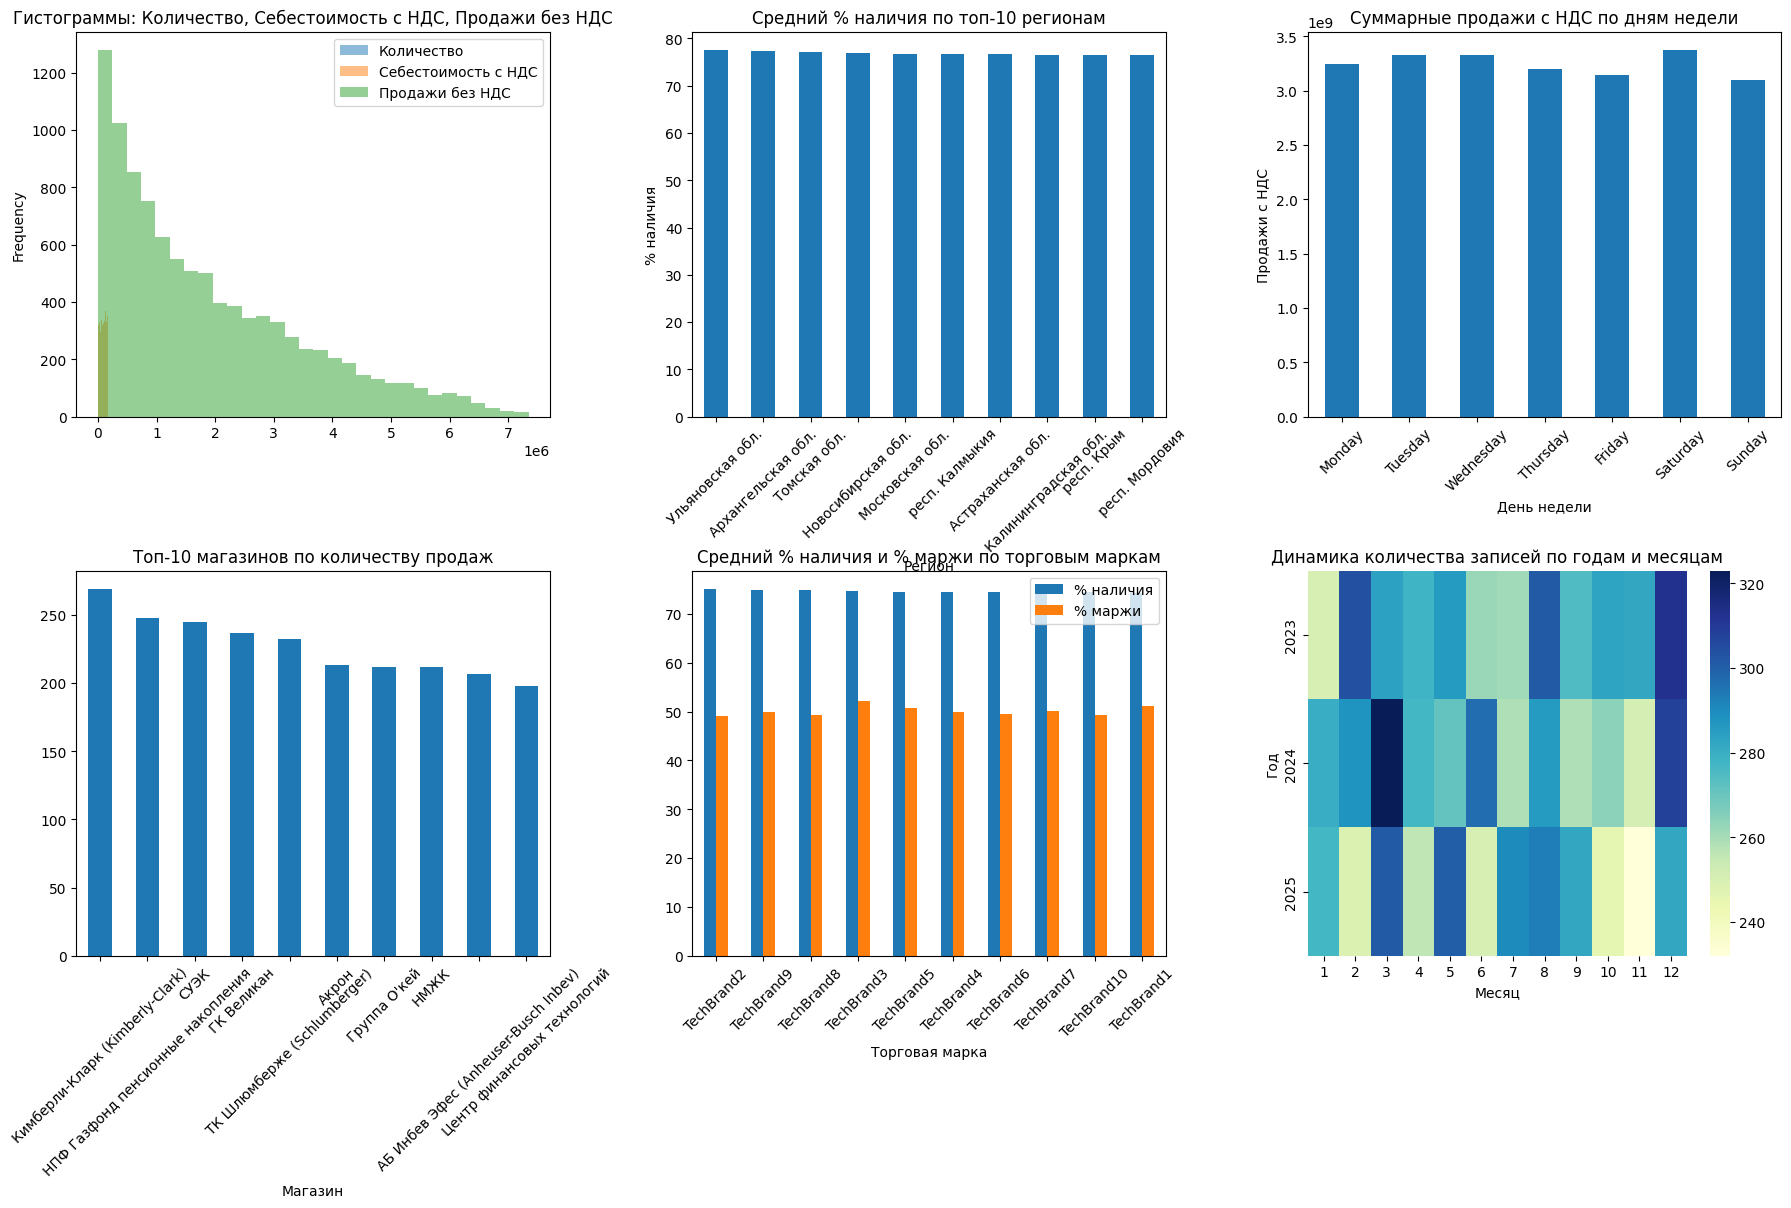

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('tech_products_full_10000.csv')

numeric_cols = [
    'Количество',
    'Себестоимость с НДС',
    'Продажи без НДС',
    'Продажи с НДС',
    'СуммаНДС',
    'Остаток количество',
    'Средний остаток шт',
    'Дни продаж',
    'Оборачиваемость шт. раз',
    '% наличия',
    '% маржи'
]

sales_cost_by_country = df.groupby('Страна').agg({
    'Продажи с НДС': 'sum',
    'Продажи без НДС': 'sum',
    'Себестоимость с НДС': 'sum',
    'Количество': 'sum'
}).sort_values(by='Продажи с НДС', ascending=False)

avg_sales_turnover_by_category = df.groupby('Категория').agg({
    'Продажи с НДС': 'mean',
    'Оборачиваемость шт. раз': 'mean',
    'Количество': 'mean'
}).sort_values(by='Продажи с НДС', ascending=False)

stock_by_store = df.groupby('Магазин').agg({
    'Количество': 'sum',
    'Средний остаток шт': 'mean'
}).sort_values(by='Количество', ascending=False).head(10)

availability_margin_by_tm = df.groupby('Торговая марка').agg({
    '% наличия': 'mean',
    '% маржи': 'mean'
}).sort_values(by='% наличия', ascending=False)

counts_by_year_month = df.groupby(['Год', 'Месяц']).size().unstack(fill_value=0)

# Новый анализ 1: средний % наличия по регионам (топ-10)
availability_by_region = df.groupby('Регион')['% наличия'].mean().sort_values(ascending=False).head(10)

# Новый анализ 2: день недели с наибольшими суммарными продажами
sales_by_weekday = df.groupby('День недели')['Продажи с НДС'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

fig, axes = plt.subplots(2, 3, figsize=(22, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# 1. Гистограммы для числовых колонок (три первых)
axes[0,0].clear()
for col in numeric_cols[:3]:
    df[col].plot(kind='hist', bins=30, alpha=0.5, ax=axes[0,0], legend=True)
axes[0,0].set_title('Гистограммы: Количество, Себестоимость с НДС, Продажи без НДС')

# 2. Средний % наличия по регионам (топ-10)
availability_by_region.plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Средний % наличия по топ-10 регионам')
axes[0,1].set_ylabel('% наличия')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Продажи с НДС по дням недели
sales_by_weekday.plot(kind='bar', ax=axes[0,2])
axes[0,2].set_title('Суммарные продажи с НДС по дням недели')
axes[0,2].set_ylabel('Продажи с НДС')
axes[0,2].tick_params(axis='x', rotation=45)

# 4. Топ-10 магазинов по количеству продаж
stock_by_store['Количество'].plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Топ-10 магазинов по количеству продаж')
axes[1,0].tick_params(axis='x', rotation=45)

# 5. Средний % наличия и % маржи по торговым маркам
availability_margin_by_tm[['% наличия', '% маржи']].plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Средний % наличия и % маржи по торговым маркам')
axes[1,1].tick_params(axis='x', rotation=45)

# 6. Тепловая карта динамики количества записей
sns.heatmap(counts_by_year_month, cmap='YlGnBu', ax=axes[1,2])
axes[1,2].set_title('Динамика количества записей по годам и месяцам')
axes[1,2].set_ylabel('Год')
axes[1,2].set_xlabel('Месяц')

plt.show()


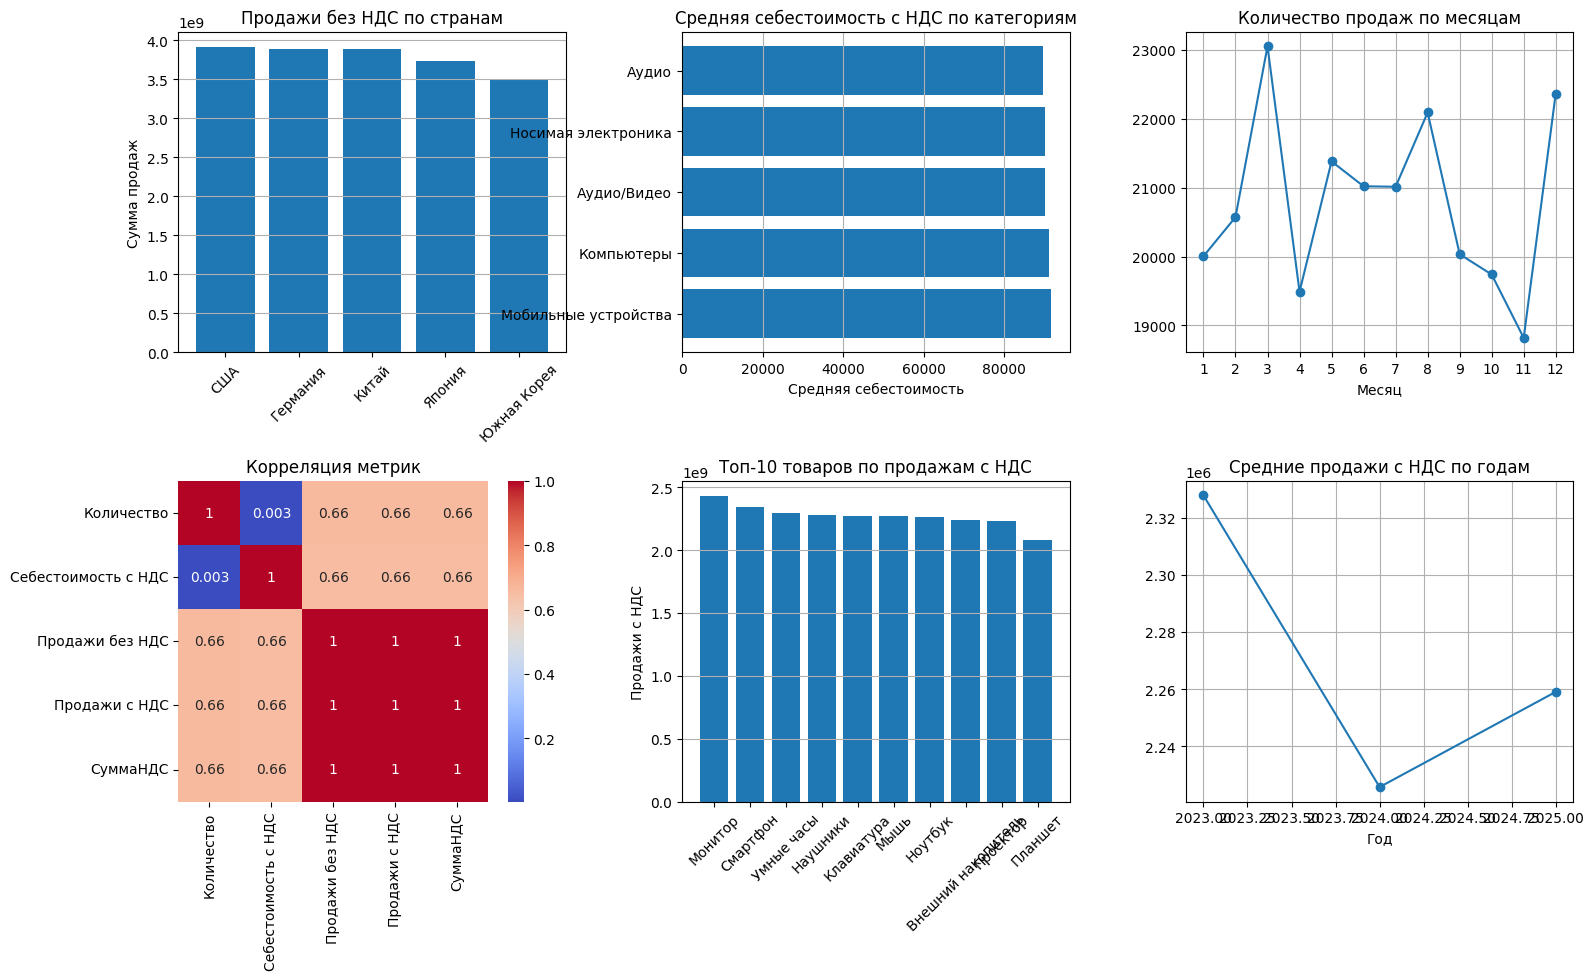

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# 1. Суммарные продажи без НДС по странам
sales_by_country = df.groupby('Страна')['Продажи без НДС'].sum().sort_values(ascending=False)
axes[0,0].bar(sales_by_country.index, sales_by_country.values)
axes[0,0].set_title('Продажи без НДС по странам')
axes[0,0].set_ylabel('Сумма продаж')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(axis='y')

# 2. Средняя себестоимость с НДС по категориям
avg_cost_by_category = df.groupby('Категория')['Себестоимость с НДС'].mean().sort_values(ascending=False)
axes[0,1].barh(avg_cost_by_category.index, avg_cost_by_category.values)
axes[0,1].set_title('Средняя себестоимость с НДС по категориям')
axes[0,1].set_xlabel('Средняя себестоимость')
axes[0,1].grid(axis='x')

# 3. Количество продаж (шт.) по месяцам
sales_qty_by_month = df.groupby('Месяц')['Продажи (шт.)'].sum()
axes[0,2].plot(sales_qty_by_month.index, sales_qty_by_month.values, marker='o')
axes[0,2].set_title('Количество продаж по месяцам')
axes[0,2].set_xlabel('Месяц')
axes[0,2].set_xticks(range(1,13))
axes[0,2].grid()

# 4. Корреляция ключевых метрик
numeric_cols = ['Количество', 'Себестоимость с НДС', 'Продажи без НДС', 'Продажи с НДС', 'СуммаНДС']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[1,0])
axes[1,0].set_title('Корреляция метрик')

# 5. Топ-10 товаров по продажам с НДС
top_products = df.groupby('Товар')['Продажи с НДС'].sum().sort_values(ascending=False).head(10)
axes[1,1].bar(top_products.index, top_products.values)
axes[1,1].set_title('Топ-10 товаров по продажам с НДС')
axes[1,1].set_ylabel('Продажи с НДС')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].grid(axis='y')

# 6. Динамика средних продаж с НДС по годам
avg_sales_by_year = df.groupby('Год')['Продажи с НДС'].mean()
axes[1,2].plot(avg_sales_by_year.index, avg_sales_by_year.values, marker='o')
axes[1,2].set_title('Средние продажи с НДС по годам')
axes[1,2].set_xlabel('Год')
axes[1,2].grid()

plt.show()


1. Подготовка данных
Предположим, ваш DataFrame df содержит следующие колонки:

Признаки (X): Код товара, Код магазина, Количество, Себестоимость, Скидка

Целевая переменная (y): Продажи (или Продажи с НДС)

Линейная регрессия - MAE: 462632.95, R²: 0.85
Полиномиальная регрессия (степень 2) - MAE: 0.00, R²: 1.00


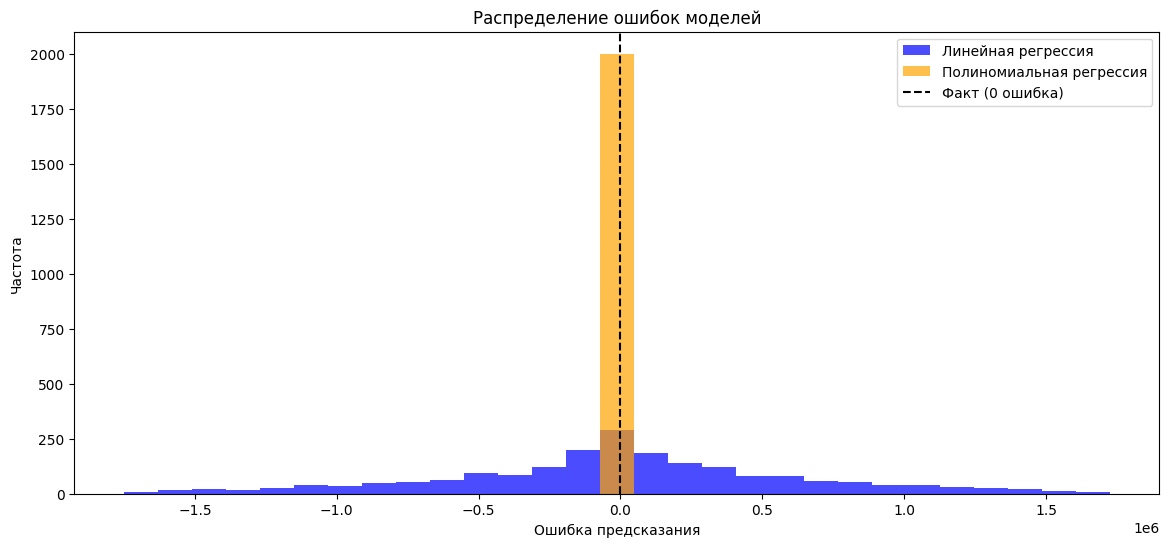

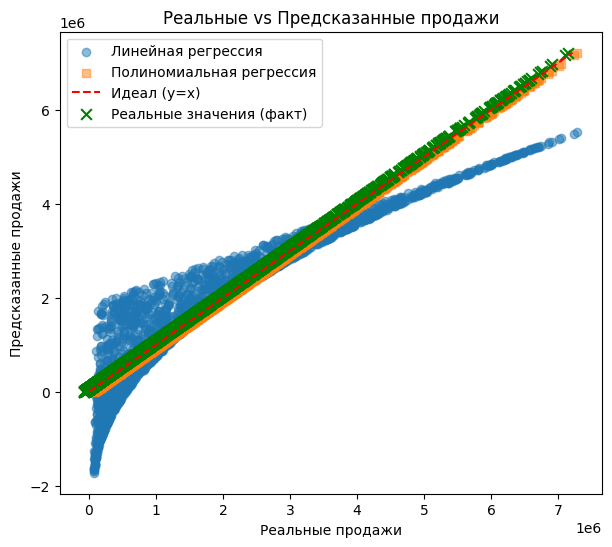

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Загрузка данных
df = pd.read_csv('tech_products_full_10000.csv', encoding='utf-8')

# Выберем несколько числовых признаков для примера
features = ['Количество', 'СебестоимостьБезНДС', 'Остаток количество']
target = 'Продажи'

data = df[features + [target]].copy()

# Проверка на пропуски
data = data.dropna()

X = data[features]
y = data[target]

# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Линейная регрессия
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# 2. Полиномиальная регрессия (степень 2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)

# Оценка моделей
def print_metrics(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - MAE: {mae:.2f}, R²: {r2:.2f}")

print_metrics(y_test, y_pred_lin, "Линейная регрессия")
print_metrics(y_test, y_pred_poly, "Полиномиальная регрессия (степень 2)")

# Визуализация

plt.figure(figsize=(14,6))

# Гистограмма ошибок с сдвигом по оси X
bins = np.linspace(min((y_test - y_pred_lin).min(), (y_test - y_pred_poly).min()),
                   max((y_test - y_pred_lin).max(), (y_test - y_pred_poly).max()), 30)

plt.hist(y_test - y_pred_lin, bins=bins - 0.2, alpha=0.7, label='Линейная регрессия', color='blue', histtype='stepfilled')
plt.hist(y_test - y_pred_poly, bins=bins + 0.2, alpha=0.7, label='Полиномиальная регрессия', color='orange', histtype='stepfilled')
plt.axvline(0, color='black', linestyle='--', label='Факт (0 ошибка)')
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('Распределение ошибок моделей')
plt.legend()
plt.show()

# График реальные vs предсказанные значения

plt.figure(figsize=(7,6))

shift = (y_test.max() - y_test.min()) * 0.01  # 1% диапазона для сдвига

plt.scatter(y_test + shift, y_pred_lin, alpha=0.5, label='Линейная регрессия', marker='o')
plt.scatter(y_test + shift, y_pred_poly, alpha=0.5, label='Полиномиальная регрессия', marker='s')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Идеал (y=x)')
plt.scatter(y_test - shift, y_test, color='green', label='Реальные значения (факт)', marker='x', s=60)

plt.xlabel('Реальные продажи')
plt.ylabel('Предсказанные продажи')
plt.title('Реальные vs Предсказанные продажи')
plt.legend()
plt.show()


kNN Regression - MAE: 899273.10, R²: 0.43


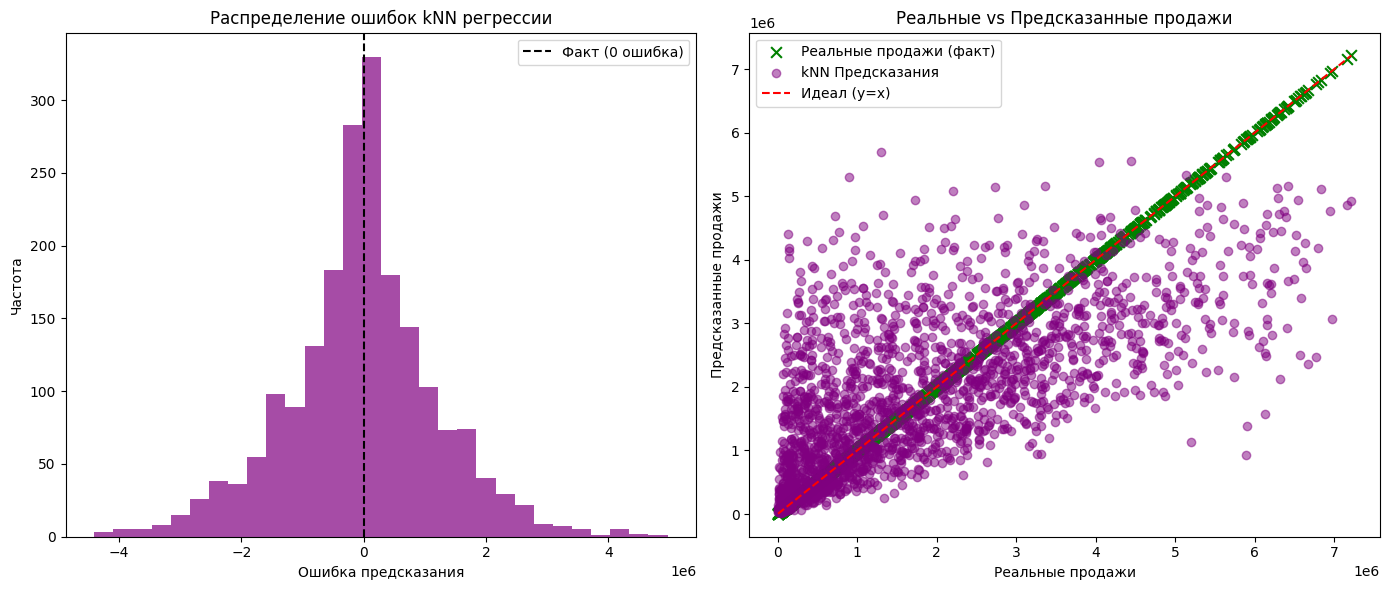

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Загрузка данных
df = pd.read_csv('tech_products_full_10000.csv', encoding='utf-8')

# Выбираем несколько числовых признаков для модели
features = ['Количество', 'СебестоимостьБезНДС', 'Остаток количество']
target = 'Продажи'

data = df[features + [target]].copy()

# Удаляем пропуски
data = data.dropna()

X = data[features]
y = data[target]

# Делим данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создаем и обучаем модель kNN регрессии
knn = KNeighborsRegressor(n_neighbors=5)  # k=5 — классическое значение, можно оптимизировать
knn.fit(X_train, y_train)

# Делаем предсказания
y_pred = knn.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"kNN Regression - MAE: {mae:.2f}, R²: {r2:.2f}")

# Визуализация результатов

plt.figure(figsize=(14,6))

# 1. Гистограмма ошибок
plt.subplot(1, 2, 1)
plt.hist(y_test - y_pred, bins=30, alpha=0.7, color='purple')
plt.axvline(0, color='black', linestyle='--', label='Факт (0 ошибка)')
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('Распределение ошибок kNN регрессии')
plt.legend()

# 2. Реальные vs предсказанные значения
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test, color='green', label='Реальные продажи (факт)', marker='x', s=60)
plt.scatter(y_test, y_pred, alpha=0.5, label='kNN Предсказания', color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Идеал (y=x)')
plt.xlabel('Реальные продажи')
plt.ylabel('Предсказанные продажи')
plt.title('Реальные vs Предсказанные продажи')
plt.legend()

plt.tight_layout()
plt.show()



c:\Users\Jiraiya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\gaussian_process\kernels.py:452: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


Gaussian Process Regression - MAE: 579.49, R²: 1.00


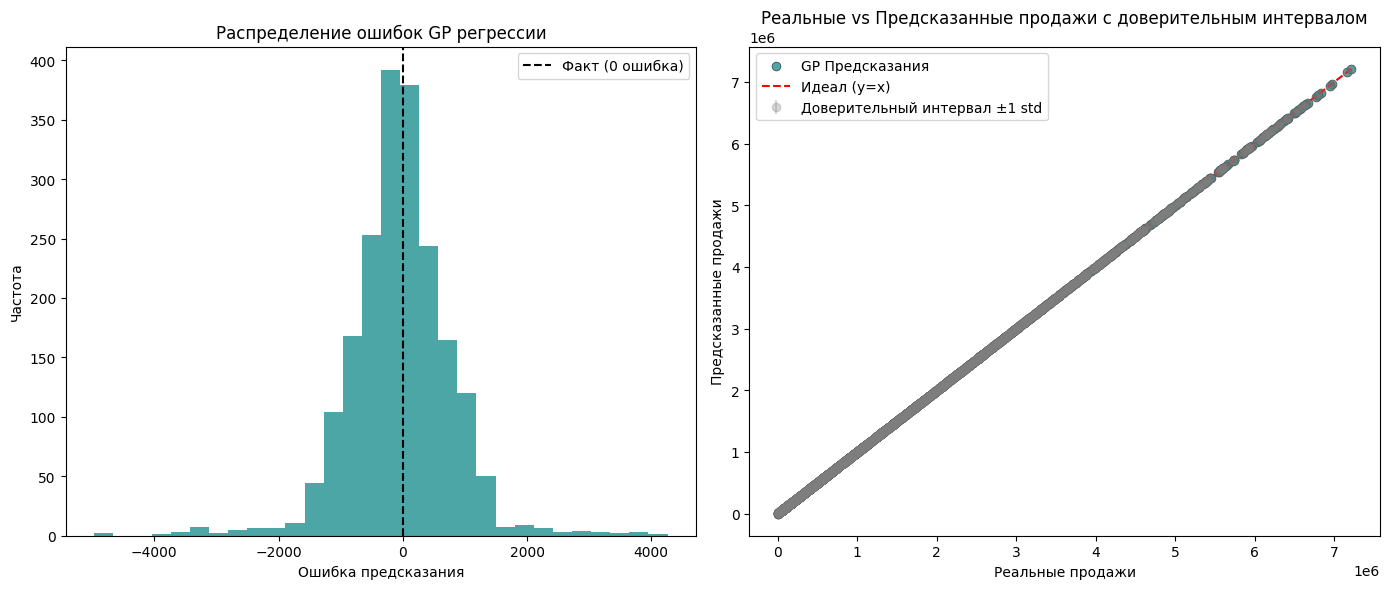

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Загрузка данных
df = pd.read_csv('tech_products_full_10000.csv', encoding='utf-8')

# Выбираем числовые признаки и целевую переменную
features = ['Количество', 'СебестоимостьБезНДС', 'Остаток количество']
target = 'Продажи'

data = df[features + [target]].copy()

# Удаляем пропуски
data = data.dropna()

X = data[features].values
y = data[target].values

# Стандартизируем признаки
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Делим данные на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Подвыборка для ускорения обучения (например, 3000 объектов)
train_sample_size = 3000
if len(X_train) > train_sample_size:
    idx = np.random.choice(len(X_train), train_sample_size, replace=False)
    X_train = X_train[idx]
    y_train = y_train[idx]

# Определяем упрощённое ядро (без WhiteKernel для ускорения)
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

# Создаем и обучаем модель с меньшим числом рестартов
gpr = GaussianProcessRegressor(
    kernel=kernel,
    n_restarts_optimizer=2,
    alpha=1e-4,
    normalize_y=True,
    random_state=42
)

gpr.fit(X_train, y_train)

# Предсказание и оценка
y_pred, y_std = gpr.predict(X_test, return_std=True)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Gaussian Process Regression - MAE: {mae:.2f}, R²: {r2:.2f}")

# Визуализация результатов
plt.figure(figsize=(14,6))

# 1. Гистограмма ошибок
plt.subplot(1, 2, 1)
plt.hist(y_test - y_pred, bins=30, alpha=0.7, color='teal')
plt.axvline(0, color='black', linestyle='--', label='Факт (0 ошибка)')
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.title('Распределение ошибок GP регрессии')
plt.legend()

# 2. Реальные vs предсказанные значения с доверительным интервалом
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, alpha=0.7, s=40, label='GP Предсказания', color='teal', edgecolors='k', linewidth=0.5)
plt.errorbar(y_test, y_pred, yerr=y_std, fmt='o', alpha=0.3, color='gray', label='Доверительный интервал ±1 std')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Идеал (y=x)')

# Расширяем границы осей для удобства
buffer = (y_test.max() - y_test.min()) * 0.05
plt.xlim(y_test.min() - buffer, y_test.max() + buffer)
plt.ylim(y_test.min() - buffer, y_test.max() + buffer)

plt.xlabel('Реальные продажи')
plt.ylabel('Предсказанные продажи')
plt.title('Реальные vs Предсказанные продажи с доверительным интервалом')
plt.legend()

plt.tight_layout()
plt.show()
